In [ ]:
!pip install tensorflow matplotlib
!pip list

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
anyio                         3.6.2
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.15.1
astropy                       5.2.2
astunparse                    1.6.3
attrs                         23.1.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.12.1
backcall                      0.2.0
beautifulsoup4                4.11.2
bleach                        6.0.0
blis                          0.7.9
blosc2                        2.0.0
bokeh                         2.4.3
branca                        0.6.0
CacheControl   

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')#連結到雲端

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import tensorflow as tf
import os

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

[]

# 基本方式


## get圖片

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv

In [ ]:
# data = tf.keras.utils.image_dataset_from_directory('/content/gdrive/MyDrive/Security/train_group') #dataset1
data = tf.keras.utils.image_dataset_from_directory('/content/gdrive/MyDrive/Security/train_group_ver2')

Found 4000 files belonging to 40 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

In [ ]:
batch[1]

array([20,  4, 10,  7, 27,  9,  0, 29,  4, 17, 15, 17, 29,  4, 16, 25, 22,
        4, 24, 18, 34, 26, 34, 13, 39,  8, 29,  8, 22, 29, 11,  4],
      dtype=int32)

In [ ]:
'''fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])'''

'fig, ax = plt.subplots(ncols=4, figsize=(20,20))\nfor idx, img in enumerate(batch[0][:4]):\n    ax[idx].imshow(img.astype(int))\n    ax[idx].title.set_text(batch[1][idx])'

In [ ]:
#print(batch[0].max())
#print(batch[0].min())
data = data.map(lambda x,y: (x/255, y)) #將値控制在0~1之間

In [ ]:
data.as_numpy_iterator().next()

(array([[[[0.30980393, 0.24705882, 0.18431373],
          [0.30980393, 0.24705882, 0.18431373],
          [0.30980393, 0.24705882, 0.18431373],
          ...,
          [0.45882353, 0.4       , 0.2784314 ],
          [0.45882353, 0.4       , 0.2784314 ],
          [0.45882353, 0.4       , 0.2784314 ]],
 
         [[0.30980393, 0.24705882, 0.18431373],
          [0.30980393, 0.24705882, 0.18431373],
          [0.30980393, 0.24705882, 0.18431373],
          ...,
          [0.45882353, 0.4       , 0.2784314 ],
          [0.45970333, 0.4008798 , 0.27931118],
          [0.46141237, 0.40258884, 0.28102022]],
 
         [[0.30980393, 0.24705882, 0.18431373],
          [0.30980393, 0.24705882, 0.18431373],
          [0.30980393, 0.24705882, 0.18431373],
          ...,
          [0.45882353, 0.4       , 0.2784314 ],
          [0.4595784 , 0.40075487, 0.27918622],
          [0.46104473, 0.4022212 , 0.28065258]],
 
         ...,
 
         [[0.22352941, 0.19607843, 0.1254902 ],
          [0.22206

## 分割資料集


In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## 建立模型

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(40, activation='Softmax'))

In [ ]:
from sklearn.metrics import log_loss
model.compile('adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

## 訓練模型

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train,epochs=10,batch_size=100 ,validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


87/87 [==============================] - 352s 4s/step - loss: 3.4159 - accuracy: 0.1135 - val_loss: 2.6045 - val_accuracy: 0.2750
Epoch 2/10
87/87 [==============================] - 18s 206ms/step - loss: 1.5163 - accuracy: 0.5948 - val_loss: 0.5757 - val_accuracy: 0.8525
Epoch 3/10
87/87 [==============================] - 19s 211ms/step - loss: 0.3028 - accuracy: 0.9249 - val_loss: 0.1040 - val_accuracy: 0.9750
Epoch 4/10
87/87 [==============================] - 19s 206ms/step - loss: 0.1319 - accuracy: 0.9648 - val_loss: 0.0772 - val_accuracy: 0.9775
Epoch 5/10
87/87 [==============================] - 18s 205ms/step - loss: 0.0680 - accuracy: 0.9824 - val_loss: 0.0253 - val_accuracy: 0.9950
Epoch 6/10
87/87 [==============================] - 20s 222ms/step - loss: 0.0705 - accuracy: 0.9810 - val_loss: 0.0355 - val_accuracy: 0.9900
Epoch 7/10
87/87 [==============================] - 19s 209ms/step - loss: 0.0115 - accuracy: 0.9975 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 8/10
8

## 訓練結果呈現

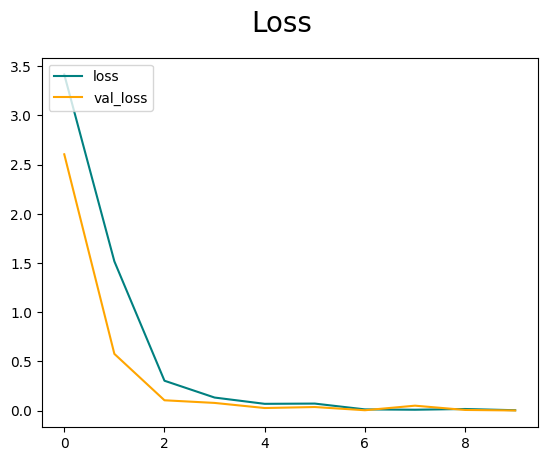

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

[0.11350574344396591, 0.5948275923728943, 0.9249281883239746, 0.9647988677024841, 0.9823994040489197, 0.9809626340866089, 0.9974856376647949, 0.9974856376647949, 0.9967672228813171, 0.9996408224105835]


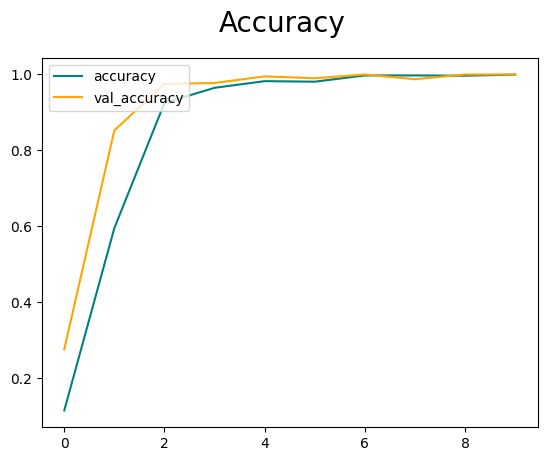

In [ ]:
fig = plt.figure()
print(hist.history['accuracy'])
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## 用測試集進行測試

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, SparseCategoricalAccuracy,BinaryAccuracy,Accuracy

In [ ]:
pre = Precision()
re = Recall()
acc = Accuracy()

In [ ]:
for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  y_pred=np.argmax(yhat,axis=1)
  #print(y.shape)
  #print(yhat.shape)
  #print(y)
  #print(yhat)
  pre.update_state(y, y_pred)
  re.update_state(y, y_pred)
  acc.update_state(y, y_pred)

1/1 [==============================] - 0s 35ms/step


In [ ]:
print(pre.result().numpy(),re.result().numpy(),acc.result().numpy())

1.0 1.0 1.0


# 其他嘗試資料集名稱
Only模糊化

原本dataset：train_group

彩圖dataset；train_group_ver2

／／／／／／

改變參數-交錯
train:train_group_8
test:test_group_8

改變遮罩-0(test)
train:train_group_8
test:test_group_8

改變遮罩-50(test)
train:train_group_8
test:test_group_8_50

改變遮罩-75(test)
train:train_group_8
test:test_group_8_75

改變遮罩-50(train&test)
train&test:train_group_mask

改變遮罩-75(train&test)
train&test:train_group_mask2

改變參數-減少參數
train:train_group_8_less
test:test_group_8_less

改變參數-減少參數&99+
train:train_group_8_less
test:test_group_99_less

改變參數-99+(test皆為模糊化)
train:train_group_8
test:test_group_99_less

# 實驗3-1~3-2:嘗試用遮罩1、遮罩2


## get圖片

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv

In [ ]:
#data = tf.keras.utils.image_dataset_from_directory('/content/gdrive/MyDrive/Security/train_group_mask') #50%
data = tf.keras.utils.image_dataset_from_directory('/content/gdrive/MyDrive/Security/train_group_mask2')#75%

Found 4000 files belonging to 40 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

In [ ]:
batch[1]

array([31, 21, 14, 33,  4, 32,  9, 14, 25,  3, 26,  8,  6, 33, 23,  5, 35,
       14,  2, 13, 10, 19, 27, 20,  6, 39, 14,  3, 24,  8, 28, 13],
      dtype=int32)

In [ ]:
'''fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])'''

'fig, ax = plt.subplots(ncols=4, figsize=(20,20))\nfor idx, img in enumerate(batch[0][:4]):\n    ax[idx].imshow(img.astype(int))\n    ax[idx].title.set_text(batch[1][idx])'

In [ ]:
#print(batch[0].max())
#print(batch[0].min())
data = data.map(lambda x,y: (x/255, y)) #將値控制在0~1之間

In [ ]:
data.as_numpy_iterator().next()

(array([[[[0.46666667, 0.46666667, 0.46666667],
          [0.46666667, 0.46666667, 0.46666667],
          [0.46666667, 0.46666667, 0.46666667],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.46666667, 0.46666667, 0.46666667],
          [0.46666667, 0.46666667, 0.46666667],
          [0.46666667, 0.46666667, 0.46666667],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.46666667, 0.46666667, 0.46666667],
          [0.46666667, 0.46666667, 0.46666667],
          [0.46666667, 0.46666667, 0.46666667],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

## 分割資料集


In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## 建立模型

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(40, activation='Softmax'))

In [ ]:
from sklearn.metrics import log_loss
model.compile('adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

## 訓練模型

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train,epochs=10,batch_size=100 ,validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
87/87 [==============================] - 1107s 13s/step - loss: 3.5732 - accuracy: 0.0420 - val_loss: 3.1517 - val_accuracy: 0.1262
Epoch 2/10
87/87 [==============================] - 16s 184ms/step - loss: 2.3585 - accuracy: 0.3032 - val_loss: 1.9852 - val_accuracy: 0.3862
Epoch 3/10
87/87 [==============================] - 13s 151ms/step - loss: 1.6120 - accuracy: 0.4971 - val_loss: 1.2610 - val_accuracy: 0.6350
Epoch 4/10
87/87 [==============================] - 14s 153ms/step - loss: 1.1134 - accuracy: 0.6527 - val_loss: 1.0932 - val_accuracy: 0.6313
Epoch 5/10
87/87 [==============================] - 17s 198ms/step - loss: 0.8550 - accuracy: 0.7166 - val_loss: 0.7611 - val_accuracy: 0.7425
Epoch 6/10
87/87 [==============================] - 13s 152ms/step - loss: 0.7625 - accuracy: 0.7500 - val_loss: 0.6614 - val_accuracy: 0.7650
Epoch 7/10
87/87 [==============================] - 17s 197ms/step - loss: 0.6870 - accuracy: 0.7658 - val_loss: 0.5350 - val_accuracy: 0.8175

## 訓練結果呈現

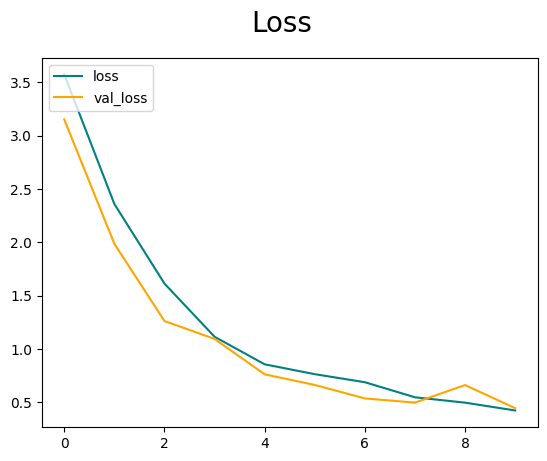

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

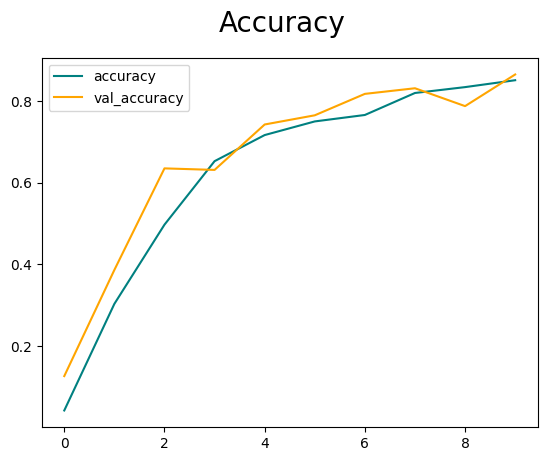

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
print(hist.history['accuracy'])

[0.0420258603990078, 0.3031609058380127, 0.49712643027305603, 0.6526580452919006, 0.7165948152542114, 0.75, 0.7658045887947083, 0.8196839094161987, 0.8340517282485962, 0.8509339094161987]


## 用測試集進行測試

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, SparseCategoricalAccuracy,BinaryAccuracy,Accuracy

In [ ]:
pre = Precision()
re = Recall()
acc = Accuracy()

In [ ]:
for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  y_pred=np.argmax(yhat,axis=1)
  #print(y.shape)
  #print(yhat.shape)
  #print(y)
  #print(yhat)
  pre.update_state(y, y_pred)
  re.update_state(y, y_pred)
  acc.update_state(y, y_pred)

1/1 [==============================] - 0s 29ms/step


In [ ]:
print(pre.result().numpy(),re.result().numpy(),acc.result().numpy())

0.99731904 0.99731904 0.859375


# 實驗4-1~4-3:嘗試用不同模糊係數的訓練集、測試集



## get圖片

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/gdrive/MyDrive/Security/train_group_8_less')
test_data = tf.keras.utils.image_dataset_from_directory('/content/gdrive/MyDrive/Security/test_group_99_less')

Found 1920 files belonging to 40 classes.
Found 240 files belonging to 40 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()
test_data_iterator = test_data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()
test_batch = data_iterator.next()

In [ ]:
batch[1]

array([22, 10, 23, 22, 27, 29, 31, 27, 29, 14, 35, 38, 25, 20, 21,  7, 12,
       23,  5, 14, 12,  4, 19,  4,  6,  9, 38,  8, 31,  8, 19, 10],
      dtype=int32)

In [ ]:
test_batch[1]

array([26, 23,  2, 36, 18, 10, 10,  6,  0, 13,  2, 21,  1, 11, 26, 13, 16,
       36, 13, 28, 22, 24,  6, 24, 12, 35,  2,  1,  7,  3, 11, 24],
      dtype=int32)

In [ ]:
'''fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])'''

'fig, ax = plt.subplots(ncols=4, figsize=(20,20))\nfor idx, img in enumerate(batch[0][:4]):\n    ax[idx].imshow(img.astype(int))\n    ax[idx].title.set_text(batch[1][idx])'

In [ ]:
#print(batch[0].max())
#print(batch[0].min())
data = data.map(lambda x,y: (x/255, y)) #將値控制在0~1之間
test_data = test_data.map(lambda x,y: (x/255, y))

In [ ]:
#data.as_numpy_iterator().next()

## 分割資料集


In [ ]:
train_size = int(len(data)*.8)
val_size = int(len(data)*.2)
#test_size = int(len(data)*.1)

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
#test = data.skip(train_size+val_size).take(test_size)

## 建立模型

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(40, activation='Softmax'))

In [ ]:
from sklearn.metrics import log_loss
model.compile('adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 30, 30, 16)      

## 訓練模型

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train,epochs=10,batch_size=100 ,validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
48/48 [==============================] - 287s 6s/step - loss: 3.6719 - accuracy: 0.0365 - val_loss: 3.3039 - val_accuracy: 0.1250
Epoch 2/10
48/48 [==============================] - 104s 2s/step - loss: 2.1644 - accuracy: 0.4004 - val_loss: 1.0402 - val_accuracy: 0.6901
Epoch 3/10
48/48 [==============================] - 105s 2s/step - loss: 0.6449 - accuracy: 0.8001 - val_loss: 0.3326 - val_accuracy: 0.8932
Epoch 4/10
48/48 [==============================] - 105s 2s/step - loss: 0.2220 - accuracy: 0.9342 - val_loss: 0.1061 - val_accuracy: 0.9661
Epoch 5/10
48/48 [==============================] - 105s 2s/step - loss: 0.1478 - accuracy: 0.9590 - val_loss: 0.1186 - val_accuracy: 0.9609
Epoch 6/10
48/48 [==============================] - 115s 2s/step - loss: 0.1464 - accuracy: 0.9603 - val_loss: 0.0204 - val_accuracy: 0.9974
Epoch 7/10
48/48 [==============================] - 104s 2s/step - loss: 0.0105 - accuracy: 1.0000 - val_loss: 0.0114 - val_accuracy: 0.9948
Epoch 8/10
48

## 訓練結果呈現

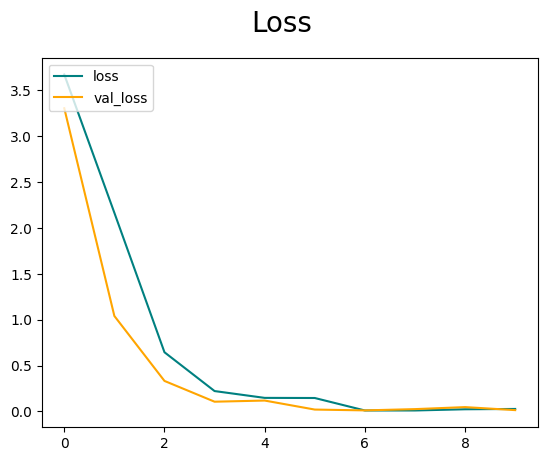

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

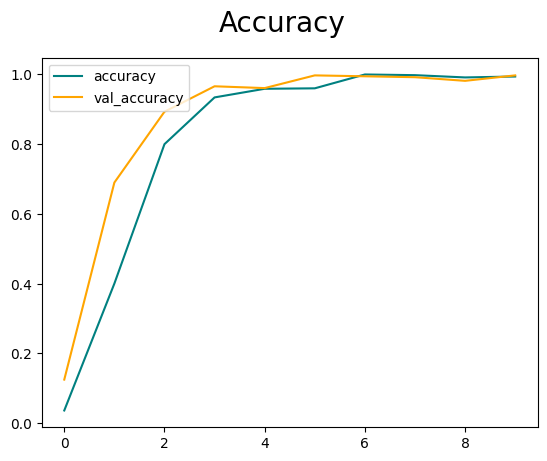

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
print(hist.history['accuracy'])

[0.0364583320915699, 0.400390625, 0.8001301884651184, 0.9342448115348816, 0.958984375, 0.9602864384651184, 1.0, 0.998046875, 0.9915364384651184, 0.994140625]


## 用測試集進行測試

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, SparseCategoricalAccuracy,BinaryAccuracy,Accuracy

In [ ]:
pre = Precision()
re = Recall()
acc = Accuracy()

In [ ]:
for test_batch in test_data.as_numpy_iterator():
  X, y = test_batch
  yhat = model.predict(X)
  y_pred=np.argmax(yhat,axis=1)
  #print(y.shape)
  #print(yhat.shape)
  #print(y)
  #print(yhat)
  pre.update_state(y, y_pred)
  re.update_state(y, y_pred)
  acc.update_state(y, y_pred)

1/1 [==============================] - 0s 333ms/step


In [ ]:
print(pre.result().numpy(),re.result().numpy(),acc.result().numpy())

0.9868421 0.96153843 0.26666668
